# Exploratory Data Analysis
Exploratory Data Analysis is a crucial step in understanding our dataset and making informed decisions about feature engineering, model selection, and more.

## Objective
- Create visualizations to explore the dataset, provide insights through various graphs, and draw conclusions after each analysis step. Identify patterns within the data and suggest potential feature engineering opportunities.

In [1]:
import numpy as np 
import pandas as pd

In [4]:
df = pd.read_csv('mushroom.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,...,white,white,partial,white,one,pendant,black,scattered,urban,p
1,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,...,white,white,partial,white,one,pendant,brown,numerous,grasses,e
2,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,...,white,white,partial,white,one,pendant,brown,numerous,meadows,e
3,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,...,white,white,partial,white,one,pendant,black,scattered,urban,p
4,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,...,white,white,partial,white,one,evanescent,brown,abundant,grasses,e


In [6]:
df.shape

(8124, 23)

In [10]:
df.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,convex,scaly,brown,no,none,free,close,broad,buff,tapering,...,white,white,partial,white,one,pendant,white,several,woods,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [14]:
df.corr

<bound method DataFrame.corr of      cap-shape cap-surface cap-color  bruises     odor gill-attachment  \
0       convex      smooth     brown  bruises  pungent            free   
1       convex      smooth    yellow  bruises   almond            free   
2         bell      smooth     white  bruises    anise            free   
3       convex       scaly     white  bruises  pungent            free   
4       convex      smooth      gray       no     none            free   
...        ...         ...       ...      ...      ...             ...   
8119   knobbed      smooth     brown       no     none        attached   
8120    convex      smooth     brown       no     none        attached   
8121      flat      smooth     brown       no     none        attached   
8122   knobbed       scaly     brown       no    fishy            free   
8123    convex      smooth     brown       no     none        attached   

     gill-spacing gill-size gill-color stalk-shape  ...  \
0           close   

## Univariate Analysis

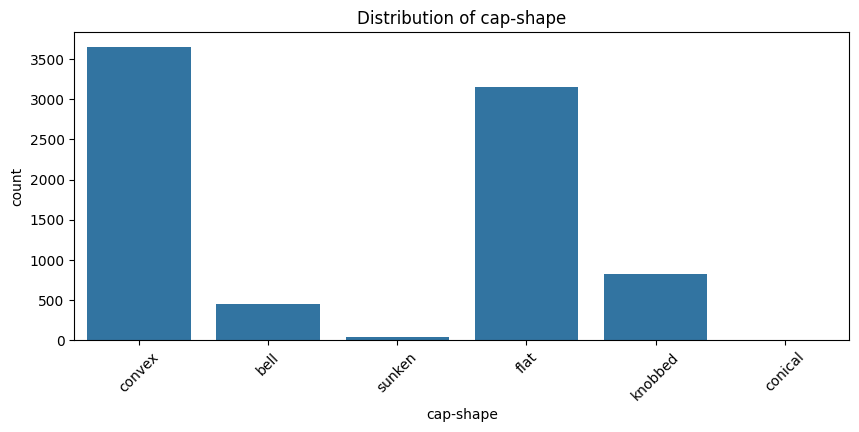

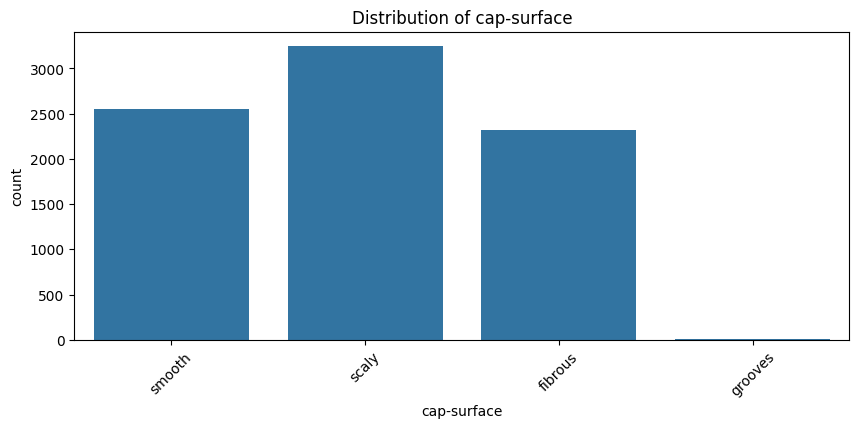

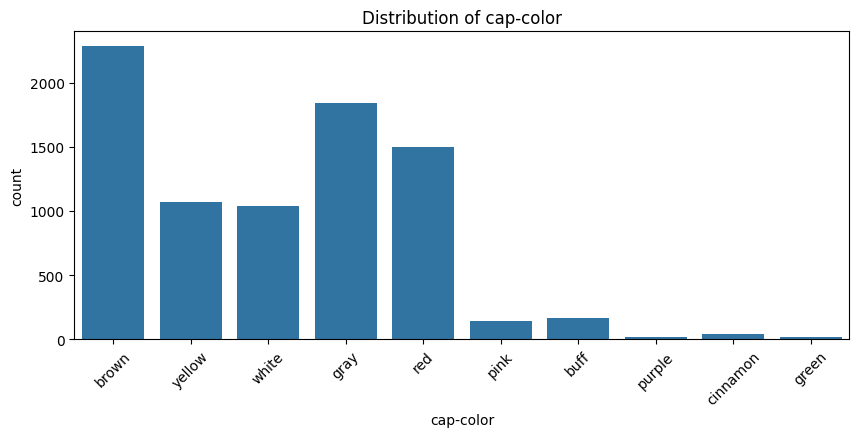

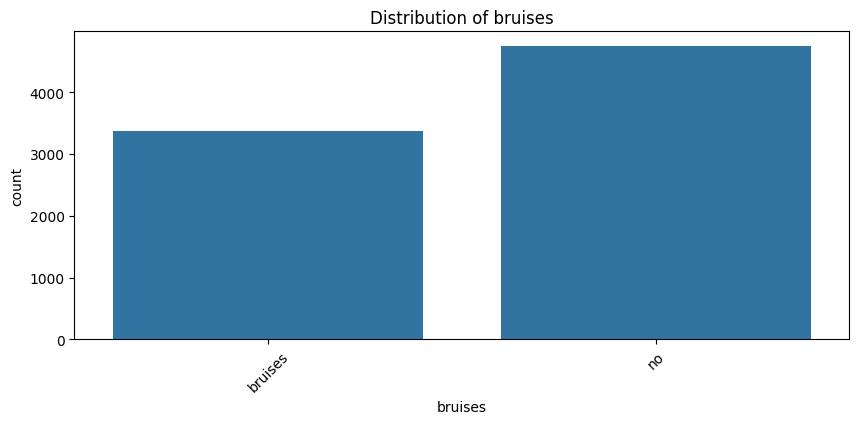

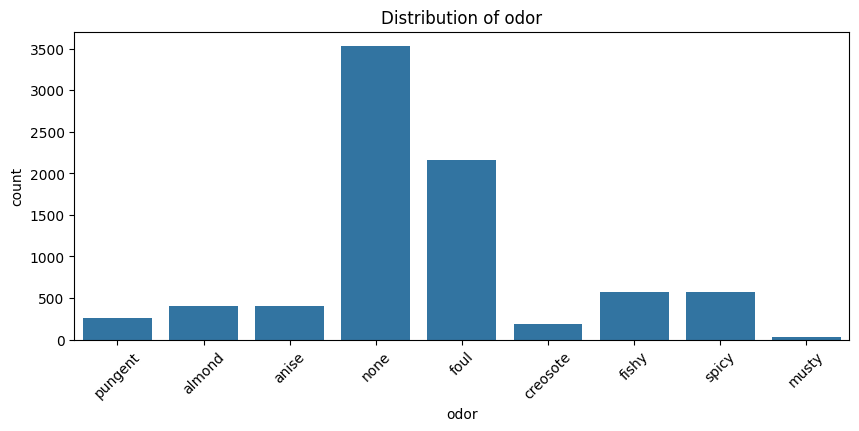

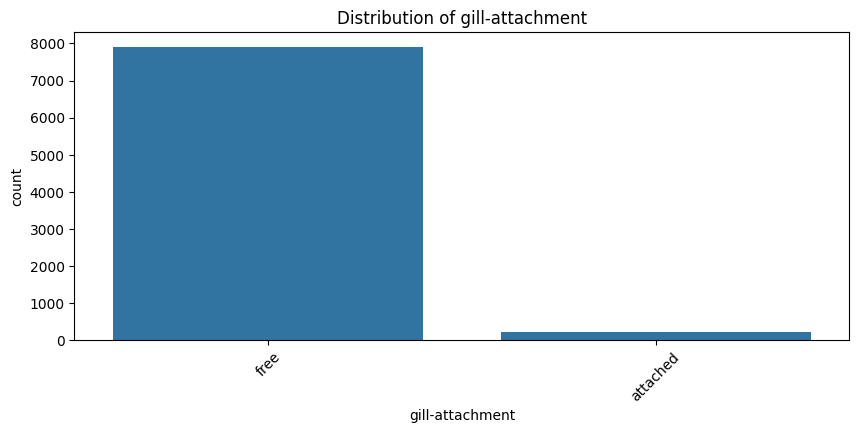

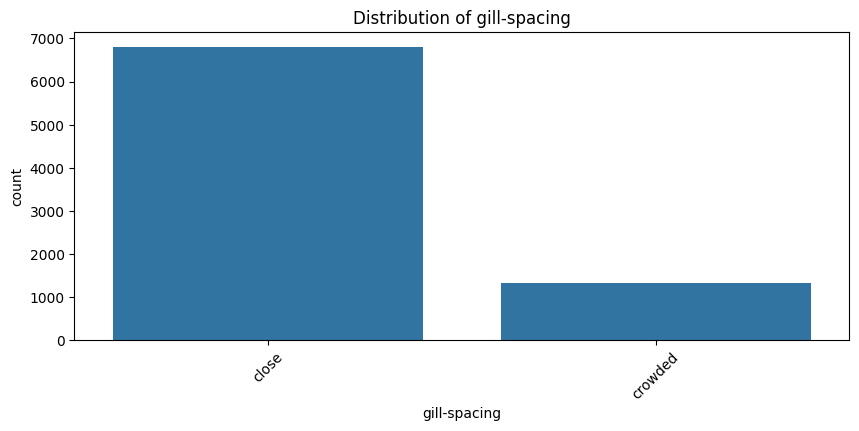

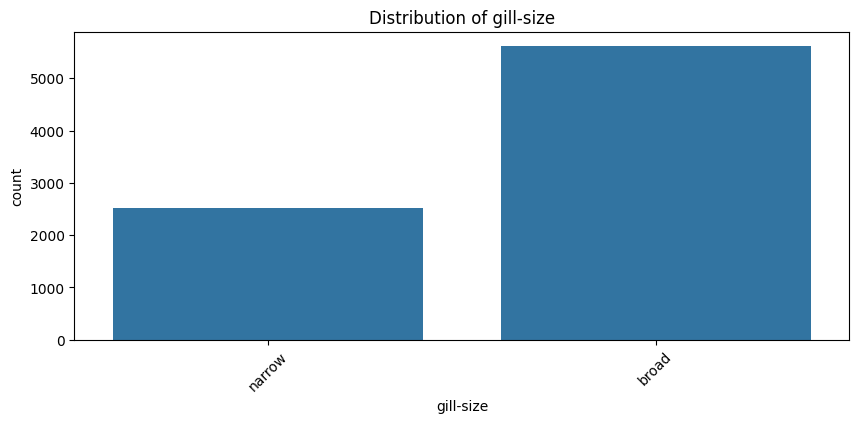

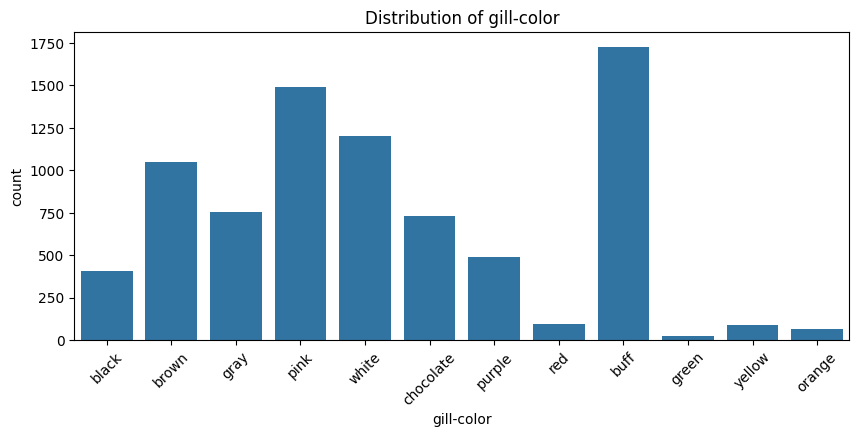

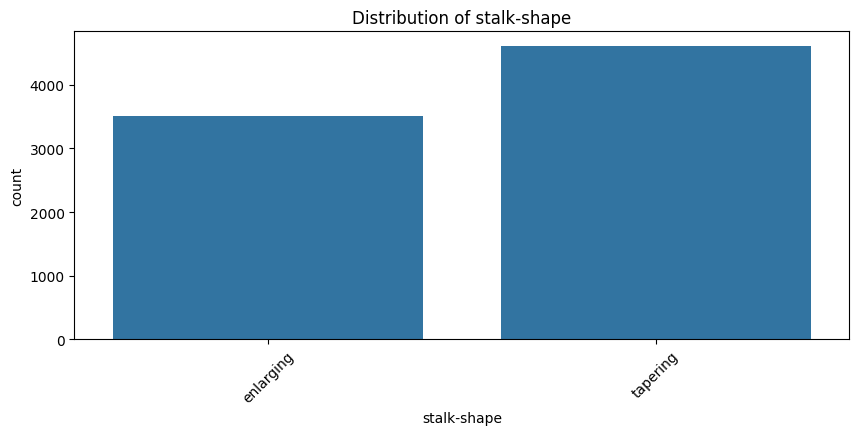

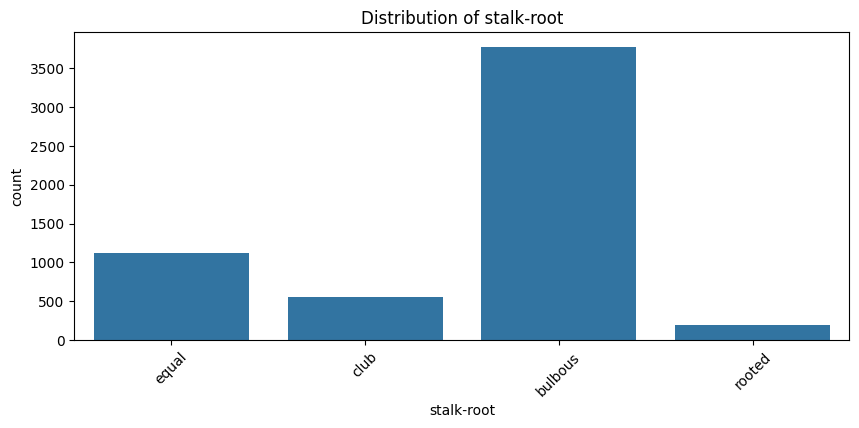

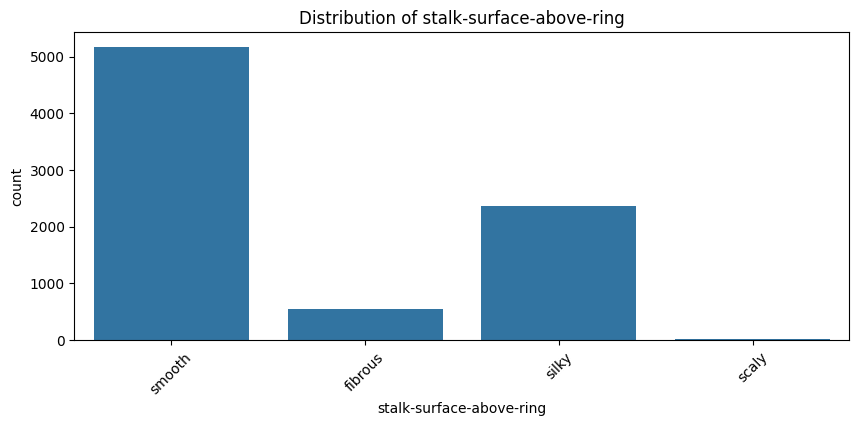

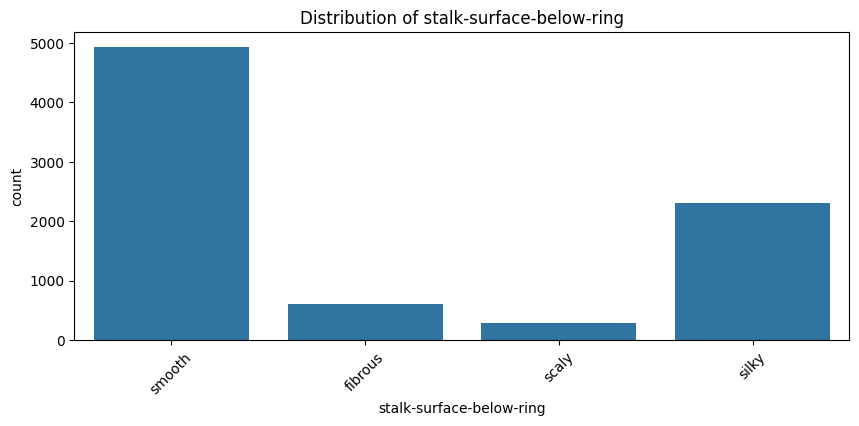

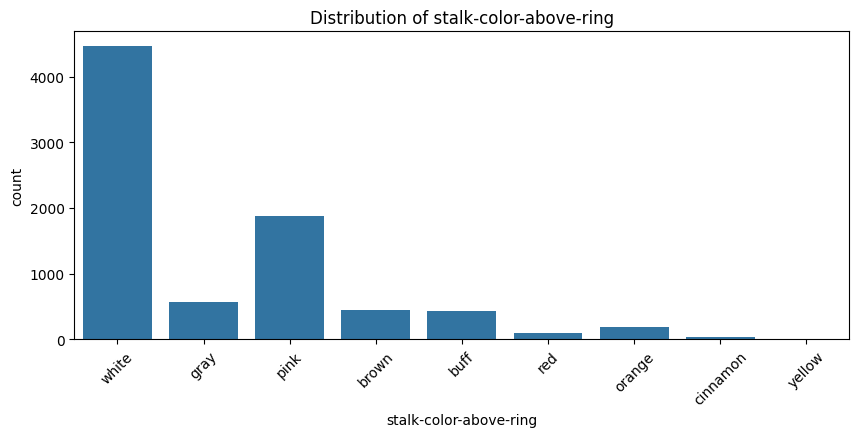

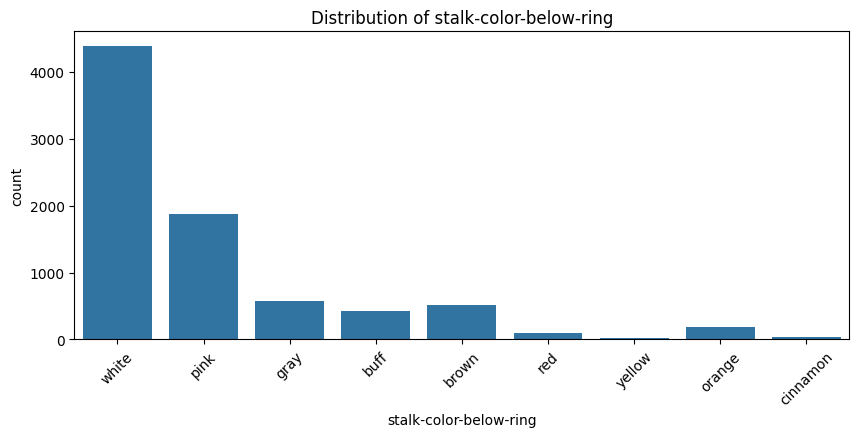

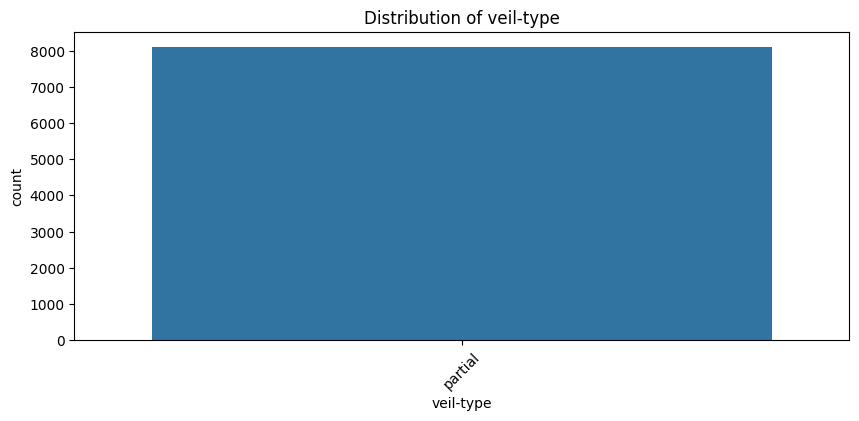

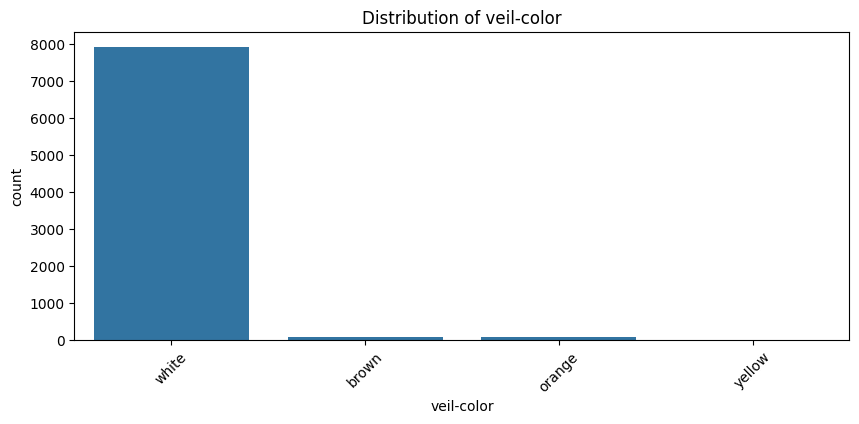

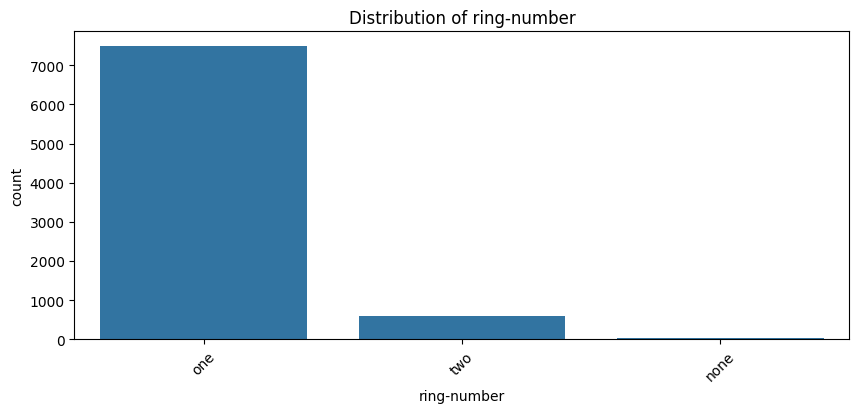

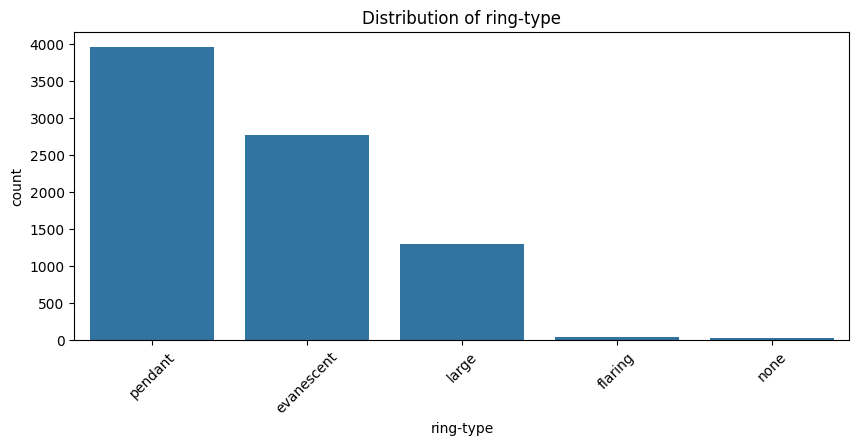

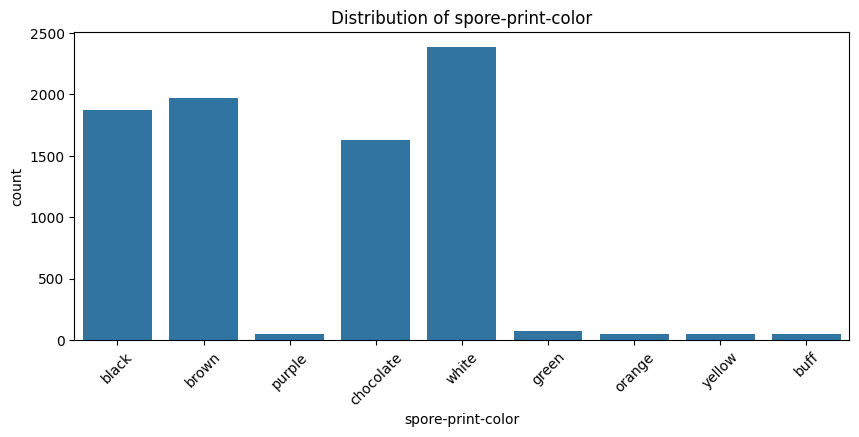

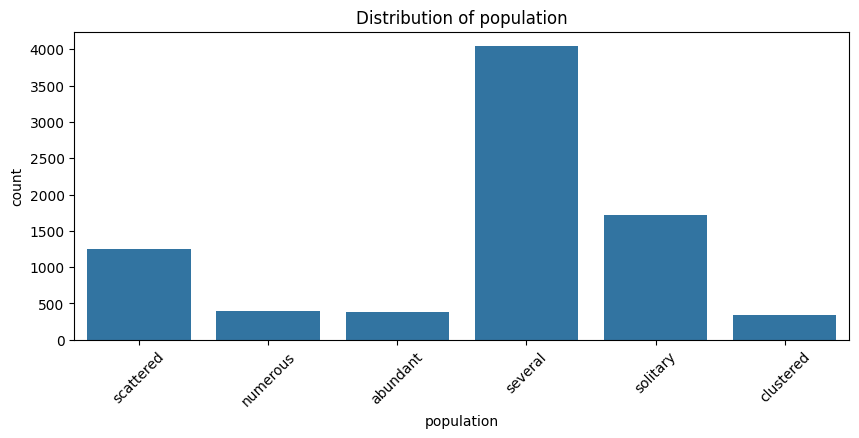

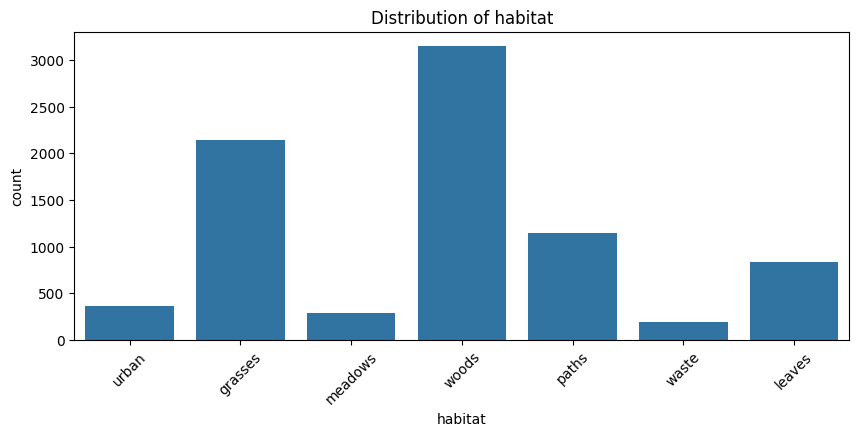

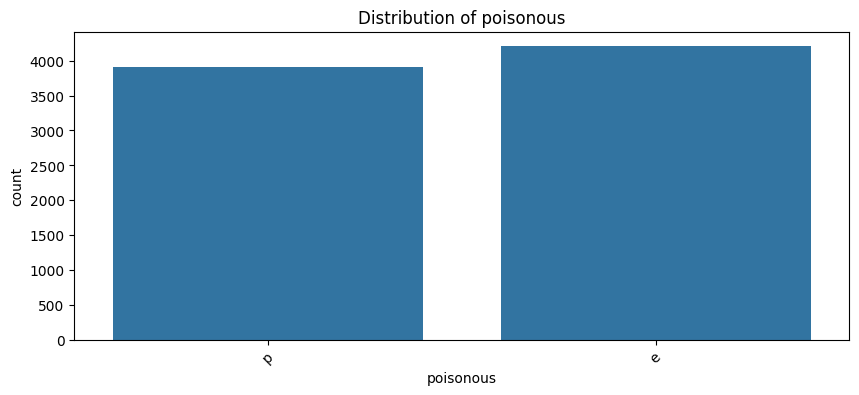

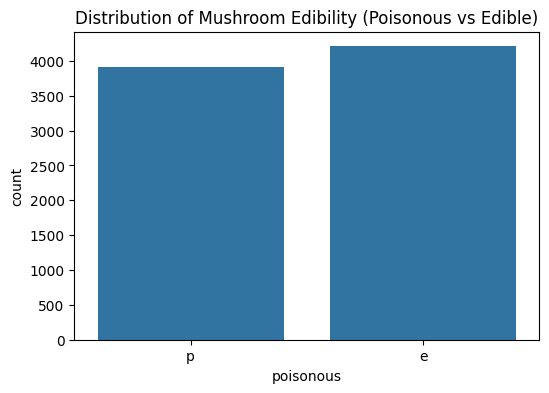

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of each categorical feature
for column in df.columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

# Distribution of the target variable 'poisonous'
plt.figure(figsize=(6, 4))
sns.countplot(x='poisonous', data=df)
plt.title('Distribution of Mushroom Edibility (Poisonous vs Edible)')
plt.show()


## Bivariate Analysis

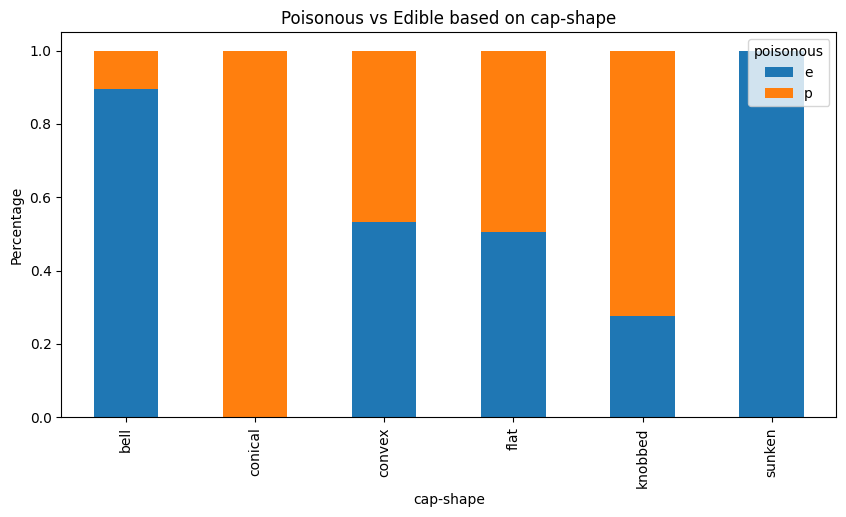

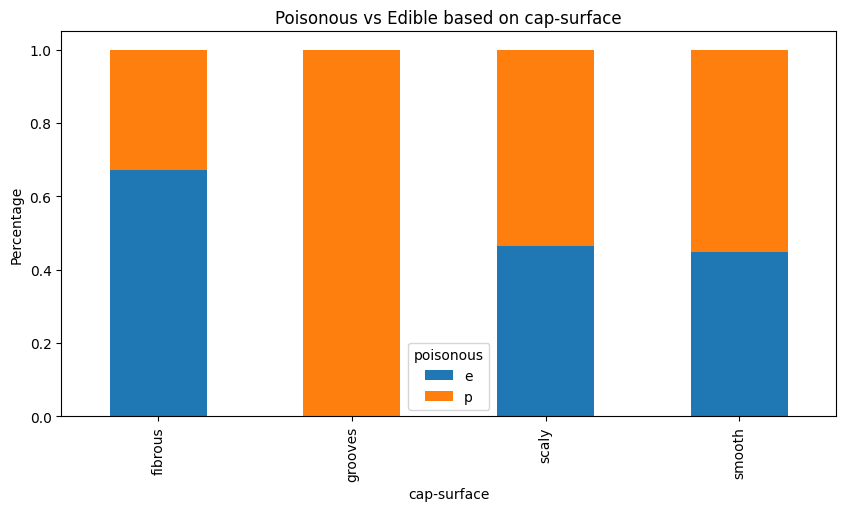

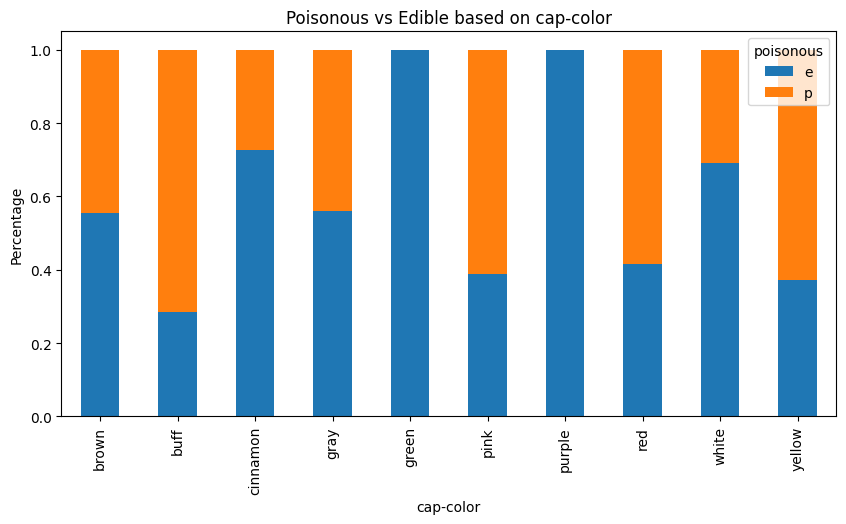

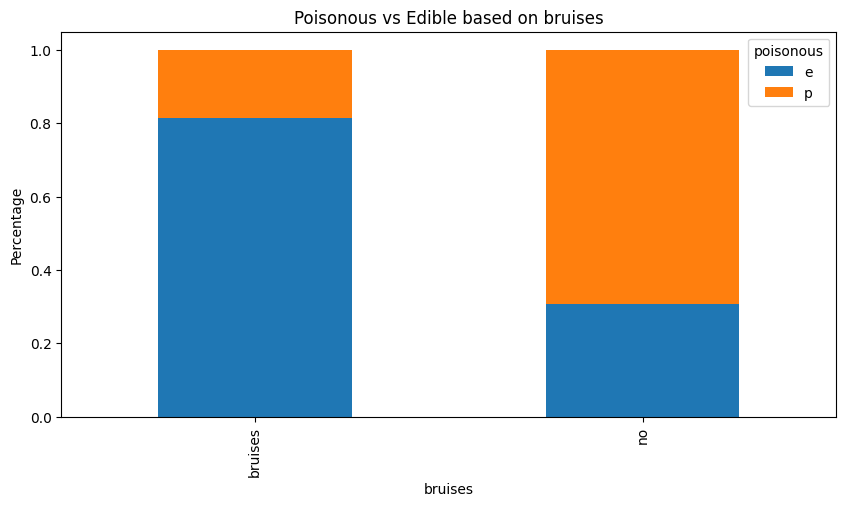

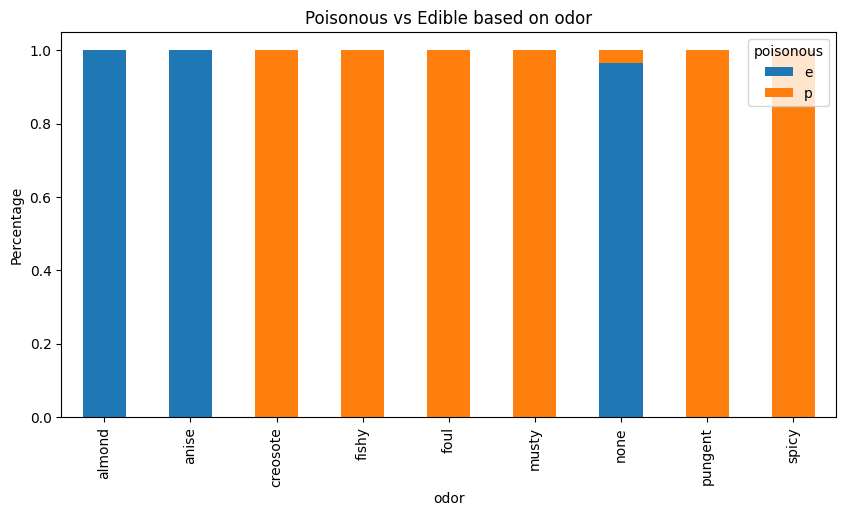

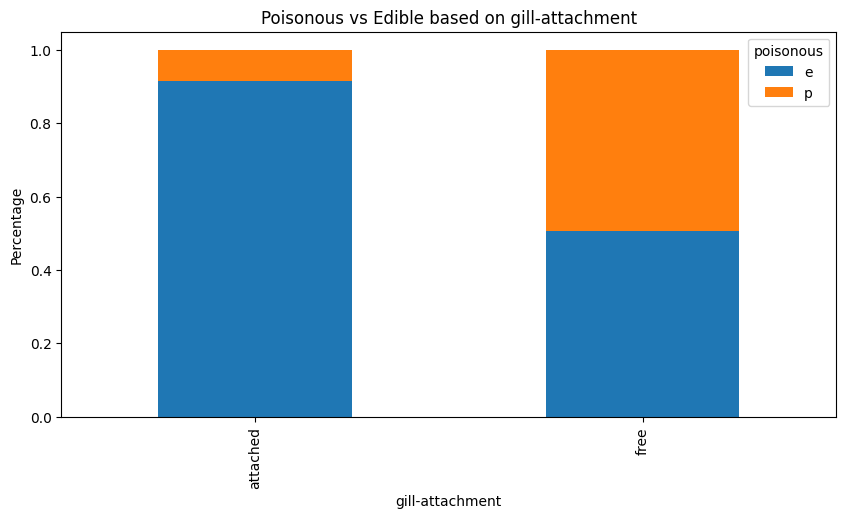

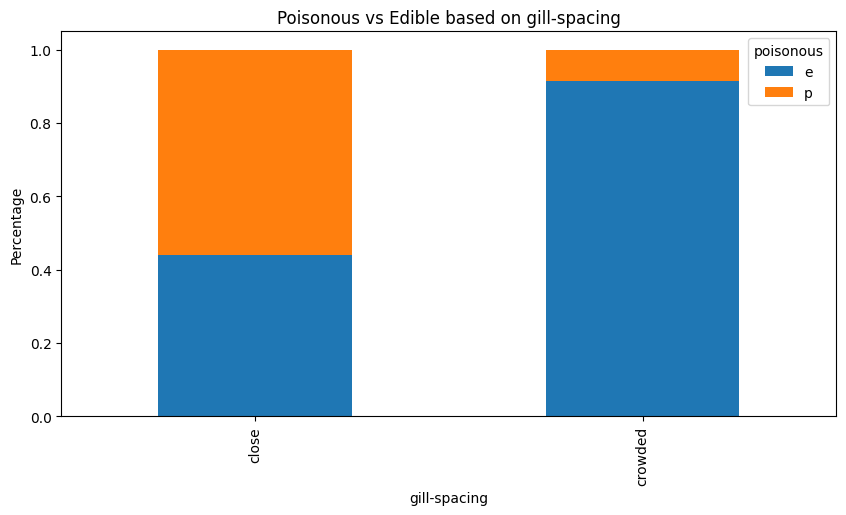

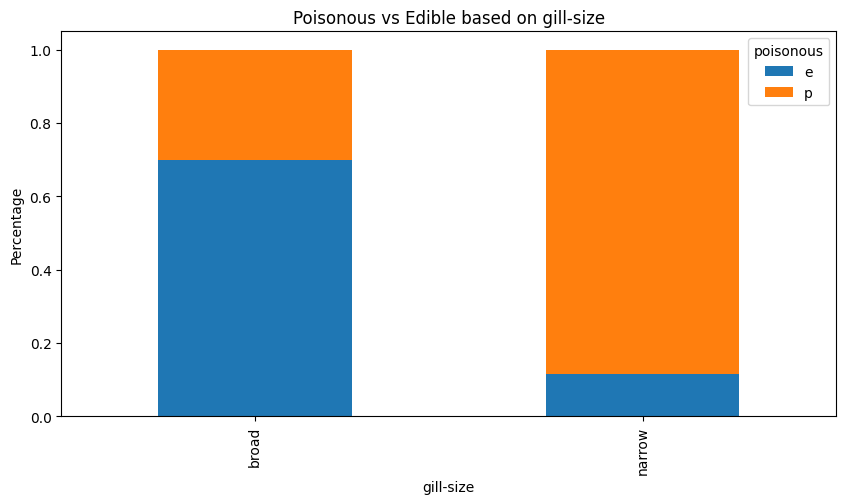

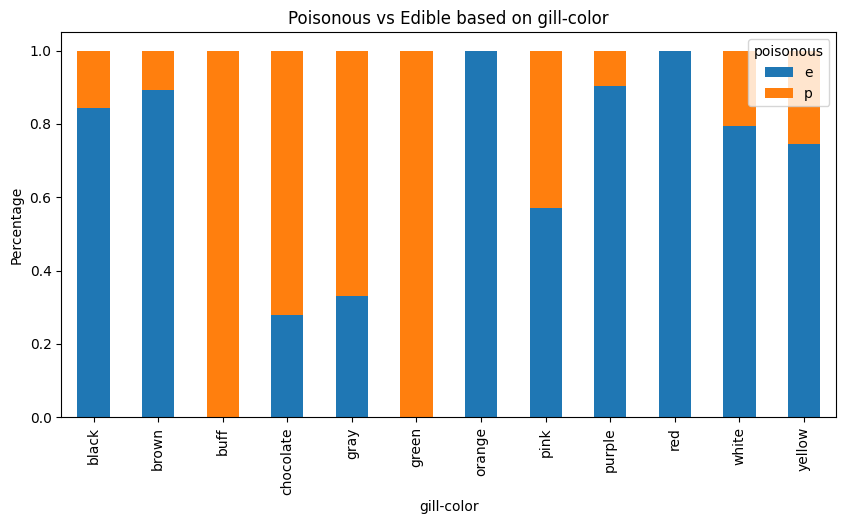

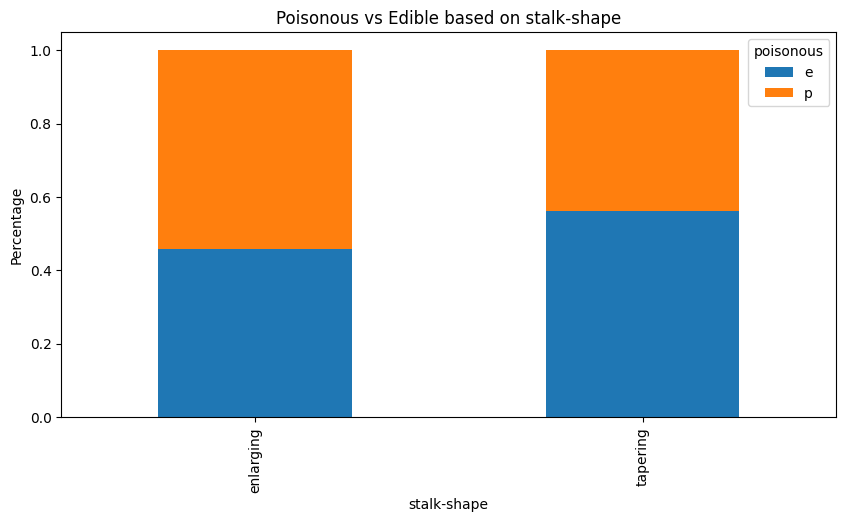

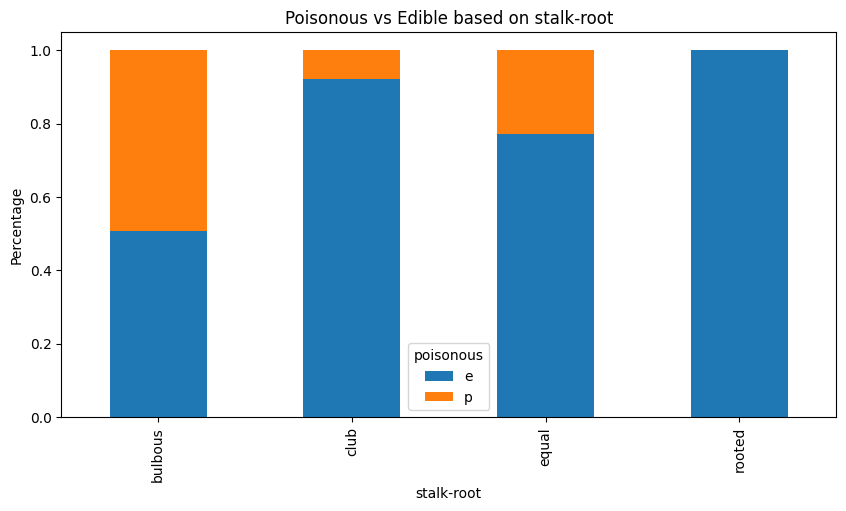

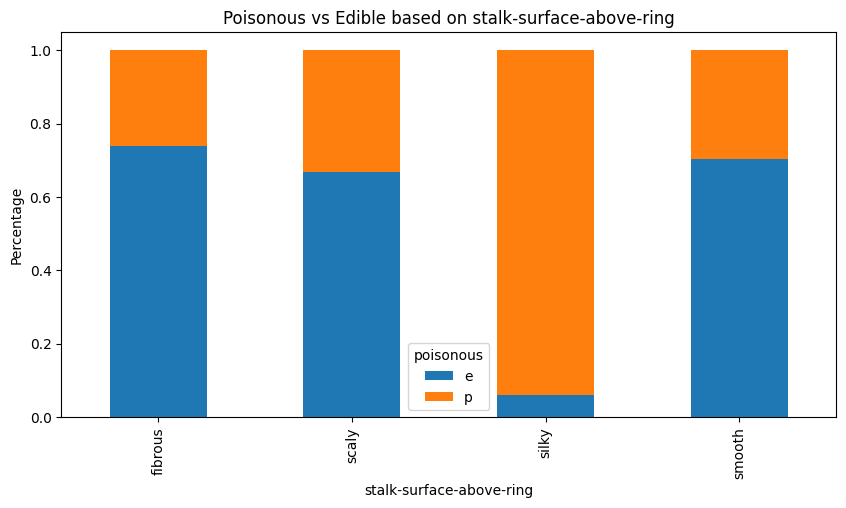

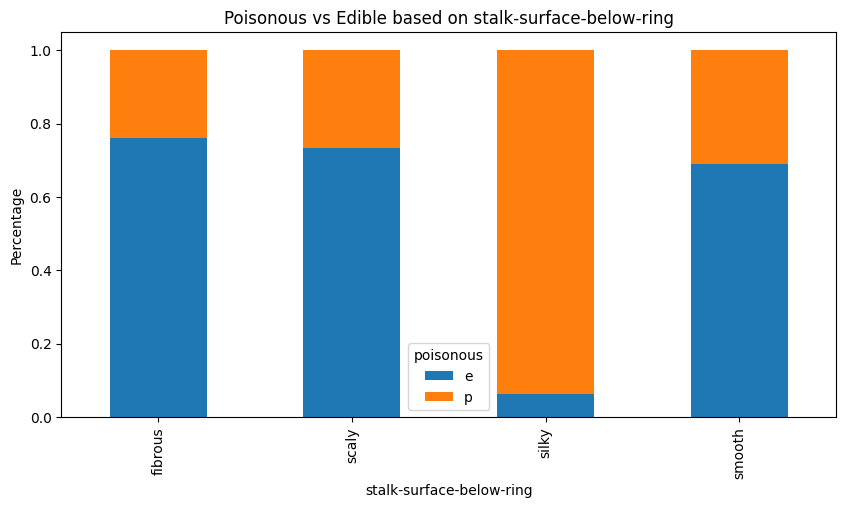

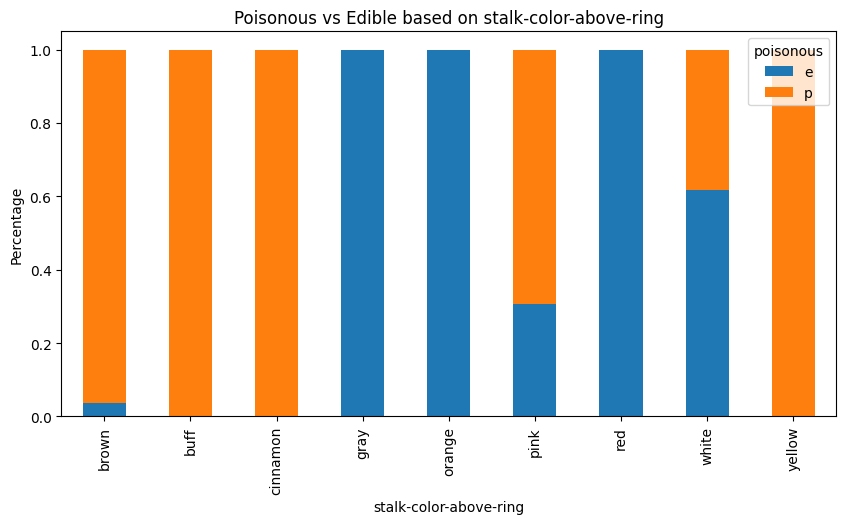

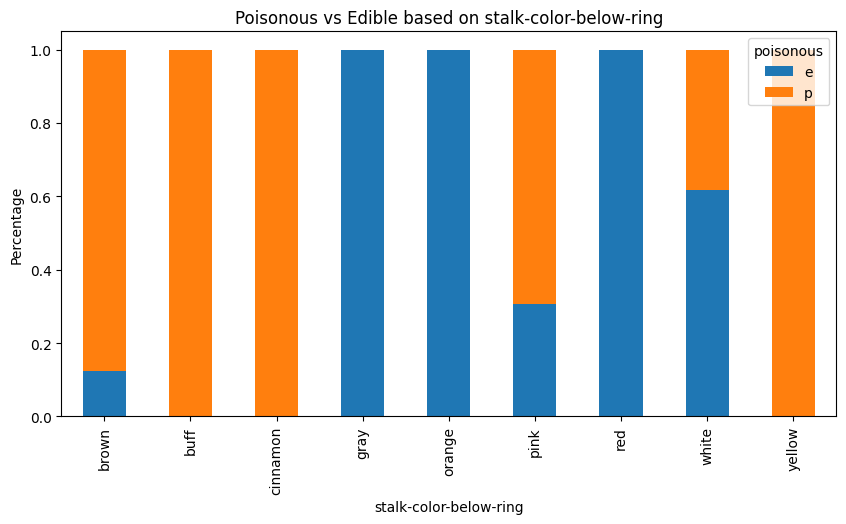

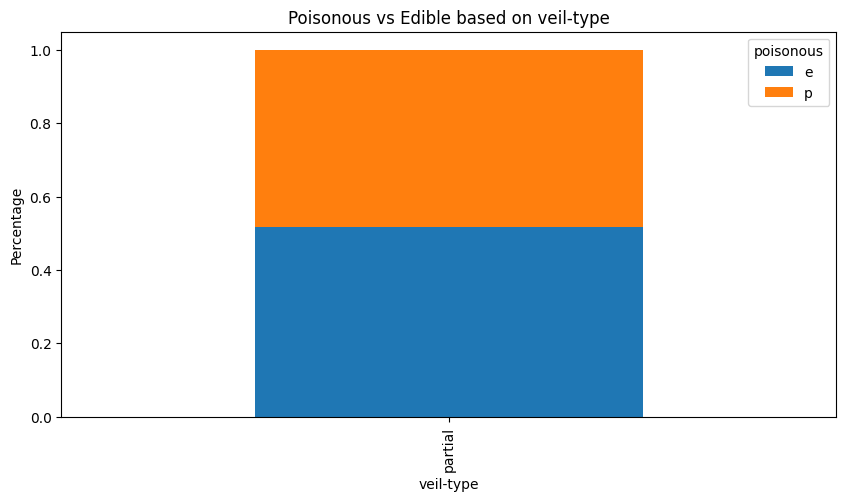

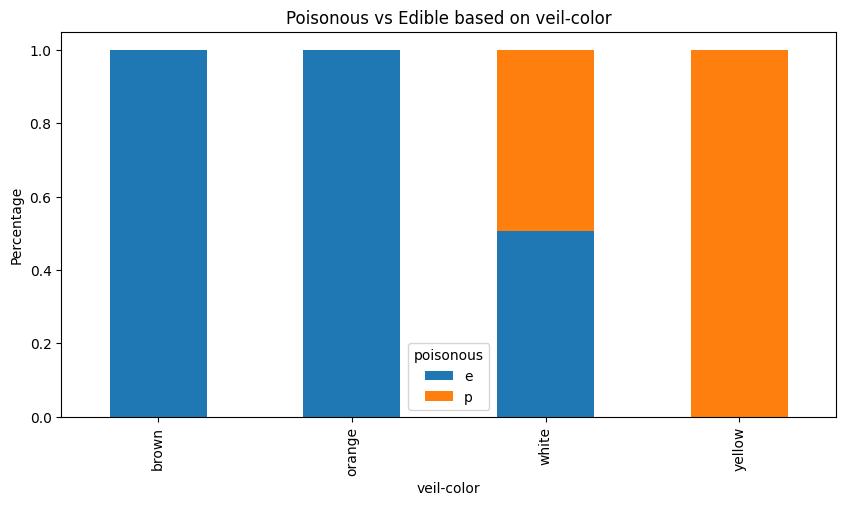

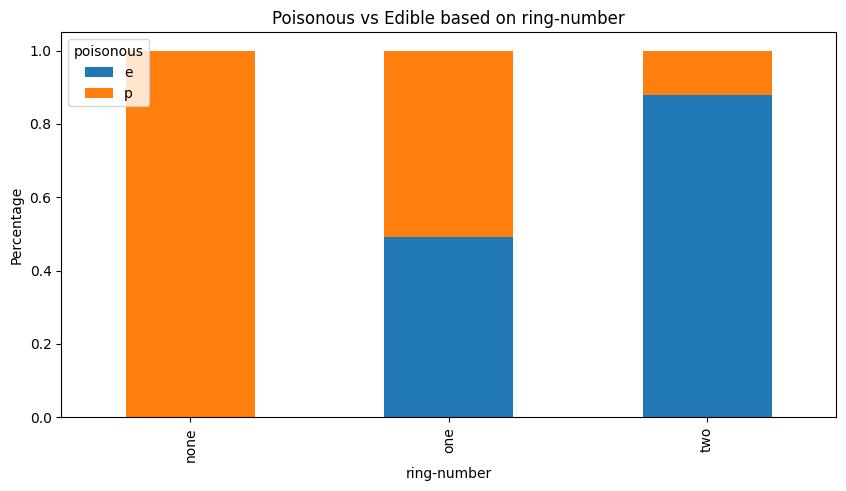

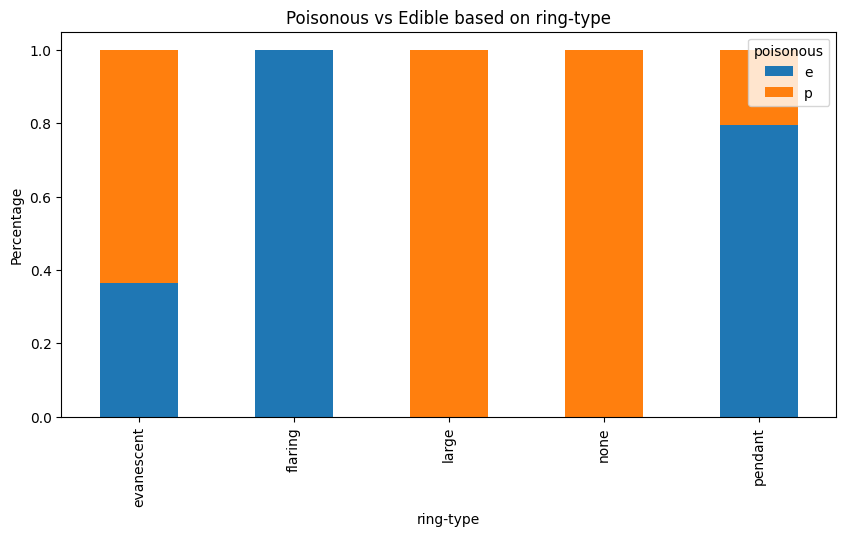

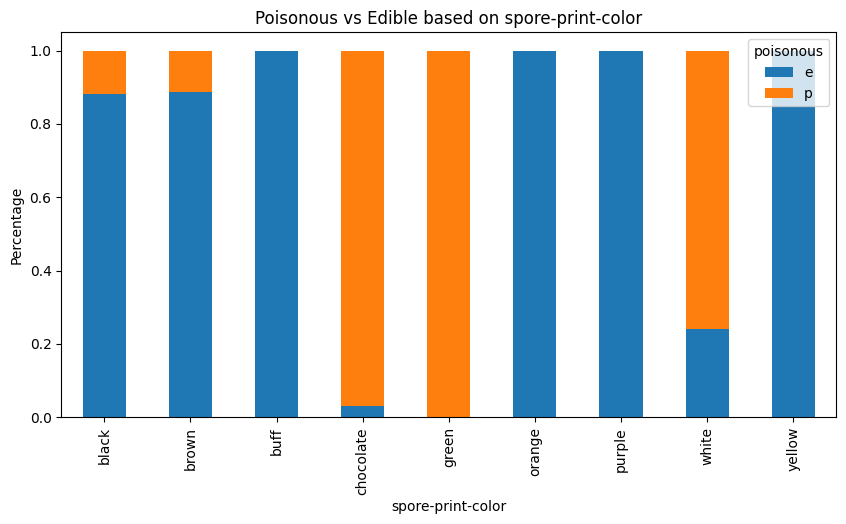

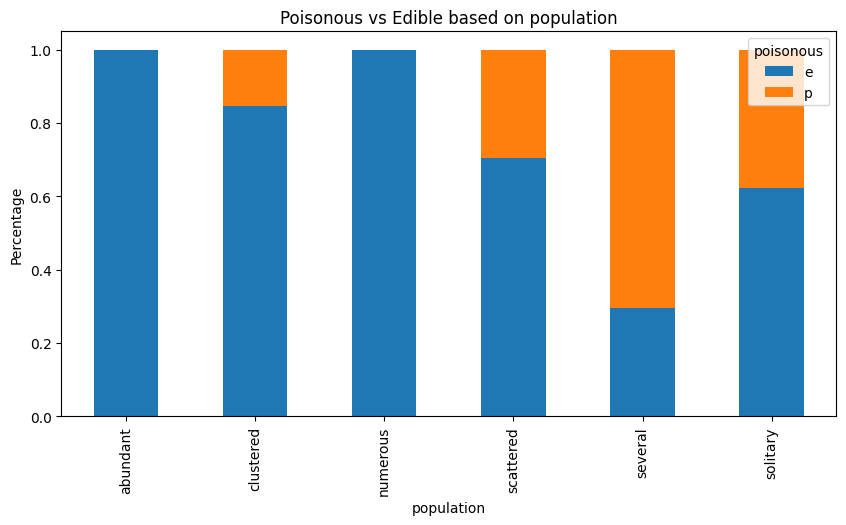

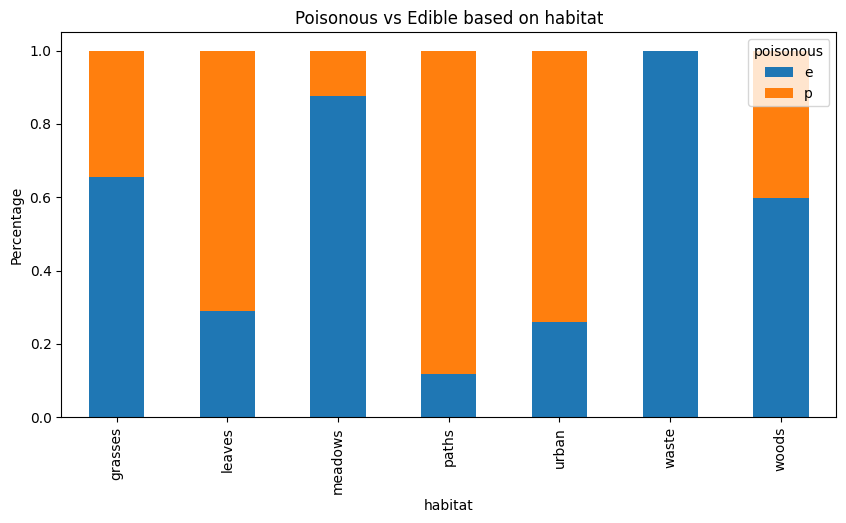

In [16]:
# Cross-tabulation of each feature with the target variable
for column in df.columns[:-1]:  # excluding the target column
    crosstab = pd.crosstab(df[column], df['poisonous'], normalize='index')
    crosstab.plot.bar(stacked=True, figsize=(10, 5))
    plt.title(f'Poisonous vs Edible based on {column}')
    plt.ylabel('Percentage')
    plt.show()


## Identifying Feature Importance

Accuracy: 1.0


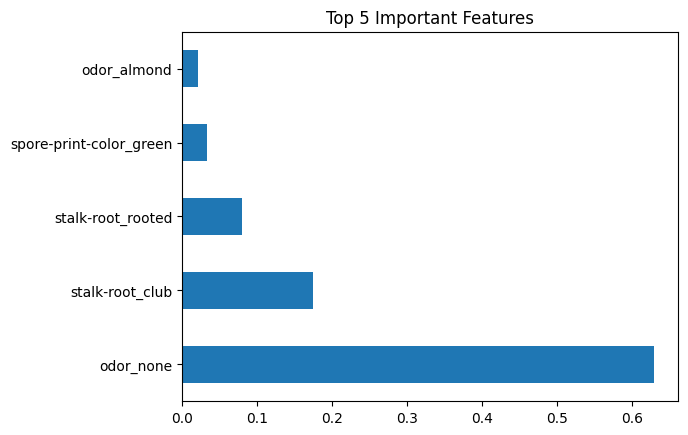

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Convert categorical variables to dummy/indicator variables
df_encoded = pd.get_dummies(df.drop('poisonous', axis=1))
X = df_encoded
y = df['poisonous'].apply(lambda x: 1 if x == 'p' else 0)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Feature importance
feature_importances = pd.Series(clf.feature_importances_, index=df_encoded.columns)
feature_importances.nlargest(5).plot(kind='barh')
plt.title('Top 5 Important Features')
plt.show()
